## Feature Selection Techniques

<hr>

### Agenda
1. Introduction to Feature Selection
2. VarianceThreshold
3. Chi-squared stats
4. ANOVA using f_classif
5. Univariate Linear Regression Tests using f_regression
6. F-score vs Mutual Information
7. Mutual Information for discrete value
8. Mutual Information for continues value
9. SelectKBest
10. SelectPercentile
11. SelectFromModel
12. Recursive Feature Elemination

<hr>

### 1. Introduction to Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets
* Below we will discuss univariate selection methods
* Also, feature elimination method

In [4]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [3]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [4]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['A'] = le.fit_transform(df.A)

In [14]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [12]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [13]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [15]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### 3. Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete

In [18]:
df = pd.read_csv('tennis.csv.txt')

In [20]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [21]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [32]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [33]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])

* Higher value means more important feature for target

### 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer_data = load_breast_cancer()

In [38]:
X = cancer_data.data
Y = cancer_data.target

In [40]:
chi2, pval = feature_selection.f_classif(X,Y)

In [45]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

* Each value represents importance of a feature

### 5. Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [54]:
from sklearn.datasets import california_housing

In [55]:
house_data = california_housing.fetch_california_housing()

In [56]:
X,Y = house_data.data, house_data.target

In [58]:
F, pval = feature_selection.f_regression(X,Y)

In [65]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

* Columns with top F values are the selected features 

### 6. F score verses Mutual Information

In [3]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [9]:
feature_selection.f_regression(X,y)

(array([187.42118421,  52.52357392,   0.47268298]),
 array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01]))

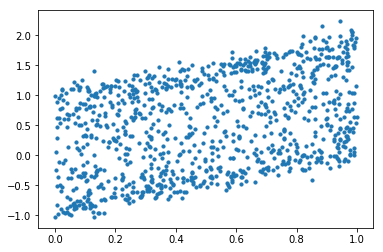

In [6]:
plt.scatter(X[:,0],y,s=10)

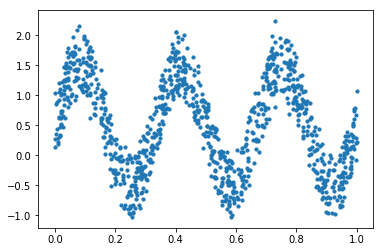

In [7]:
plt.scatter(X[:,1],y,s=10)

### 7. Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [10]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

### 8. Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [16]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [26]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [21]:
cat_cols.remove('Salary')

In [22]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [28]:
feature_selection.mutual_info_classif(adult_data, adult_data.Salary)

array([0.06756139, 0.01618405, 0.0336902 , 0.06670123, 0.06675714,
       0.11178254, 0.06331719, 0.11307409, 0.00615084, 0.02673757,
       0.08426718, 0.03138476, 0.04183453, 0.01223693, 0.55248732])

In [29]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

### 9. SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [31]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [38]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [39]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [40]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [42]:
data[0]

array([  39,   13,    4,    1,    1, 2174,   40], dtype=int64)

In [43]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [44]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [45]:
selector.scores_

array([0.06919834, 0.01914811, 0.03206688, 0.0642909 , 0.06570534,
       0.11299504, 0.06316131, 0.11589085, 0.00938895, 0.02445832,
       0.08181871, 0.03645489, 0.04061038, 0.00618429])

In [46]:
data[0]

array([  39,    9,   13,    4,    1,    1, 2174], dtype=int64)

### 10. SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [47]:
selector = feature_selection.SelectPercentile(percentile=20, score_func=feature_selection.mutual_info_classif)

In [48]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [50]:
data[:5]

array([[   4,    1, 2174],
       [   2,    0,    0],
       [   0,    1,    0],
       [   2,    0,    0],
       [   2,    5,    0]], dtype=int64)

### 11. SelectFromModel
* Selecting important features from model weights
* The estimator should support 'feature_importances'

In [51]:
from sklearn.datasets import load_boston

In [52]:
boston = load_boston()

In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
clf = LinearRegression()
sfm = feature_selection.SelectFromModel(clf, threshold=0.25)

In [60]:
sfm.fit_transform(boston.data, boston.target).shape

(506, 7)

In [61]:
boston.data.shape

(506, 13)

### 12. Recursive Feature Elimination
* Uses an external estimator to calculate weights of features
* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
* Then, the least important features are pruned from current set of features. 
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [63]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
data = selector.fit_transform(X, y)

In [65]:
X.shape

(50, 10)

In [66]:
data.shape

(50, 5)

In [67]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])